In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

# Data Preparation

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('imbd_cleaned.csv')
df.head()

,originalTitle,rating,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,criticReviewsTotal,titleType,AwNmExWins,canHaveEpisodes,isAdult,numRegions,userReviewsTotal,countryOfOrigin,genres,castNumber,companiesNumber,averageRating,regions,externalLinks,writerCredits,directorsCredits,soundMixes,quotesTotal
0,Carmencita,"(5, 6]",1894,1.0,0.000000,7.644919,1.098612,0.0,4,1.386294,short,0.0,0,0,7,2.833213,['US'],"Documentary,Short",0.693147,1.386294,5.7,"['\\N', 'DE', 'US', 'HU', 'GR', 'RU', 'UA', 'JP']",2.302585,0.0,0.693147,['silent'],0.0
1,Un bon bock,"(5, 6]",1892,12.0,0.000000,5.214936,1.098612,0.0,2,0.000000,short,0.0,0,0,6,0.693147,['FR'],"Animation,Short",0.000000,0.000000,5.4,"['\\N', 'HU', 'DE', 'FR', 'RO', 'RU', 'JP']",1.386294,0.0,0.693147,['silent'],0.0
2,Chinese Opium Den,"(4, 5]",1894,1.0,0.000000,5.278115,0.693147,0.0,1,0.000000,short,0.0,0,0,5,0.000000,['US'],Short,0.000000,0.693147,5.0,"['\\N', 'US', 'DE', 'PT', 'HU', 'RU']",1.609438,0.0,0.693147,['silent'],0.0
3,Edison Kinetoscopic Record of a Sneeze,"(5, 6]",1894,1.0,0.693147,7.713338,1.386294,0.0,4,1.098612,short,0.0,0,0,6,3.044522,['US'],"Documentary,Short",0.693147,1.945910,5.4,"['\\N', 'UA', 'JP', 'HU', 'US', 'DE', 'RU']",1.945910,0.0,0.693147,['silent'],0.0
4,Autour d'une cabine,"(6, 7]",1894,2.0,0.000000,7.107425,2.772589,0.0,1,0.000000,short,0.0,0,0,6,2.197225,['FR'],"Animation,Short",0.000000,0.000000,6.1,"['\\N', 'ES', 'US', 'FR', 'HU', 'RU', 'UA']",1.386294,0.0,0.693147,['silent'],0.0


In [3]:
# Mappa di raggruppamento
category_mapping = {
    'movie': 'Movies',
    'tvMovie': 'Movies',
    'short': 'Shorts',
    'tvShort': 'Shorts',
    'tvSeries': 'TV Series',
    'tvMiniSeries': 'TV Series',
    'tvEpisode': 'TV Series',
    'tvSpecial': 'TV Special',
    'video': 'Video',
    'videoGame': 'Videogame'
}

# Applicare la mappa al dataframe
df['titleType'] = df['titleType'].map(category_mapping)

In [4]:
# df = pd.read_csv('imbd_log.csv')

feature_names = df.select_dtypes(include=['number']).columns
df_numeric = df[feature_names]

X = df[feature_names].values

# X = df.select_dtypes(include=['number'])
# X = X.drop(['averageRating'], axis = 1)
# X = X.values
y = np.array(df['titleType'])

In [5]:
df_numeric.head()

,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,criticReviewsTotal,AwNmExWins,canHaveEpisodes,isAdult,numRegions,userReviewsTotal,castNumber,companiesNumber,averageRating,externalLinks,writerCredits,directorsCredits,quotesTotal
0,1894,1.0,0.000000,7.644919,1.098612,0.0,4,1.386294,0.0,0,0,7,2.833213,0.693147,1.386294,5.7,2.302585,0.0,0.693147,0.0
1,1892,12.0,0.000000,5.214936,1.098612,0.0,2,0.000000,0.0,0,0,6,0.693147,0.000000,0.000000,5.4,1.386294,0.0,0.693147,0.0
2,1894,1.0,0.000000,5.278115,0.693147,0.0,1,0.000000,0.0,0,0,5,0.000000,0.000000,0.693147,5.0,1.609438,0.0,0.693147,0.0
3,1894,1.0,0.693147,7.713338,1.386294,0.0,4,1.098612,0.0,0,0,6,3.044522,0.693147,1.945910,5.4,1.945910,0.0,0.693147,0.0
4,1894,2.0,0.000000,7.107425,2.772589,0.0,1,0.000000,0.0,0,0,6,2.197225,0.000000,0.000000,6.1,1.386294,0.0,0.693147,0.0


In [6]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [11]:
clf = RandomForestClassifier(n_estimators=300, 
                             criterion='gini', 
                             max_depth=None, 
                             min_samples_split=2, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_features='sqrt', 
                             random_state=0, 
                             n_jobs=-1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9323809096617924
F1-score [0.92582847 0.90388949 0.96930993 0.14248021 0.5344523  0.76873662]
              precision    recall  f1-score   support

      Movies       0.91      0.95      0.93     12835
      Shorts       0.88      0.92      0.90      4992
   TV Series       0.96      0.98      0.97     24351
  TV Special       0.75      0.08      0.14       343
       Video       0.84      0.39      0.53      1541
   Videogame       0.88      0.68      0.77       526

    accuracy                           0.93     44588
   macro avg       0.87      0.67      0.71     44588
weighted avg       0.93      0.93      0.93     44588



In [12]:
classification_report(y_test, y_pred, output_dict=True)

{'Movies': {'precision': 0.9067074992530625,
  'recall': 0.9457732761978964,
  'f1-score': 0.9258284711894139,
  'support': 12835.0},
 'Shorts': {'precision': 0.8845637583892617,
  'recall': 0.9240785256410257,
  'f1-score': 0.9038894876065445,
  'support': 4992.0},
 'TV Series': {'precision': 0.9601901845434765,
  'recall': 0.9786045747607901,
  'f1-score': 0.9693099310541194,
  'support': 24351.0},
 'TV Special': {'precision': 0.75,
  'recall': 0.07871720116618076,
  'f1-score': 0.1424802110817942,
  'support': 343.0},
 'Video': {'precision': 0.8367911479944675,
  'recall': 0.3926022063595068,
  'f1-score': 0.534452296819788,
  'support': 1541.0},
 'Videogame': {'precision': 0.8799019607843137,
  'recall': 0.6825095057034221,
  'f1-score': 0.7687366167023555,
  'support': 526.0},
 'accuracy': 0.9323809096617924,
 'macro avg': {'precision': 0.8696924251607636,
  'recall': 0.6670475483048036,
  'f1-score': 0.7074495024090025,
  'support': 44588.0},
 'weighted avg': {'precision': 0.9294

In [14]:
# Create a Pandas Series for better visualization
feature_importances = pd.Series(clf.feature_importances_, index=feature_names)

# Sort the features by importance in descending order
sorted_feature_importances = feature_importances.sort_values(ascending=False)

print("Feature Importances:")
print(sorted_feature_importances)

Feature Importances:
runtimeMinutes        0.285522
numRegions            0.144961
startYear             0.069330
averageRating         0.068183
totalCredits          0.062035
castNumber            0.056062
directorsCredits      0.052921
externalLinks         0.036349
numVotes              0.033814
writerCredits         0.033365
companiesNumber       0.029803
canHaveEpisodes       0.024809
totalImages           0.022666
awardWins             0.016137
isAdult               0.015114
userReviewsTotal      0.013749
criticReviewsTotal    0.013745
AwNmExWins            0.012281
quotesTotal           0.005825
totalVideos           0.003329
dtype: float64


In [35]:
import json
json.dumps(classification_report(y_test, y_pred, output_dict=True))

'{"Movies": {"precision": 0.9067074992530625, "recall": 0.9457732761978964, "f1-score": 0.9258284711894139, "support": 12835.0}, "Shorts": {"precision": 0.8845637583892617, "recall": 0.9240785256410257, "f1-score": 0.9038894876065445, "support": 4992.0}, "TV Series": {"precision": 0.9601901845434765, "recall": 0.9786045747607901, "f1-score": 0.9693099310541194, "support": 24351.0}, "TV Special": {"precision": 0.75, "recall": 0.07871720116618076, "f1-score": 0.1424802110817942, "support": 343.0}, "Video": {"precision": 0.8367911479944675, "recall": 0.3926022063595068, "f1-score": 0.534452296819788, "support": 1541.0}, "Videogame": {"precision": 0.8799019607843137, "recall": 0.6825095057034221, "f1-score": 0.7687366167023555, "support": 526.0}, "accuracy": 0.9323809096617924, "macro avg": {"precision": 0.8696924251607636, "recall": 0.6670475483048036, "f1-score": 0.7074495024090025, "support": 44588.0}, "weighted avg": {"precision": 0.9294989191944575, "recall": 0.9323809096617924, "f1-s

In [36]:
json.loads(json.dumps(classification_report(y_test, y_pred, output_dict=True)))

{'Movies': {'precision': 0.9067074992530625,
  'recall': 0.9457732761978964,
  'f1-score': 0.9258284711894139,
  'support': 12835.0},
 'Shorts': {'precision': 0.8845637583892617,
  'recall': 0.9240785256410257,
  'f1-score': 0.9038894876065445,
  'support': 4992.0},
 'TV Series': {'precision': 0.9601901845434765,
  'recall': 0.9786045747607901,
  'f1-score': 0.9693099310541194,
  'support': 24351.0},
 'TV Special': {'precision': 0.75,
  'recall': 0.07871720116618076,
  'f1-score': 0.1424802110817942,
  'support': 343.0},
 'Video': {'precision': 0.8367911479944675,
  'recall': 0.3926022063595068,
  'f1-score': 0.534452296819788,
  'support': 1541.0},
 'Videogame': {'precision': 0.8799019607843137,
  'recall': 0.6825095057034221,
  'f1-score': 0.7687366167023555,
  'support': 526.0},
 'accuracy': 0.9323809096617924,
 'macro avg': {'precision': 0.8696924251607636,
  'recall': 0.6670475483048036,
  'f1-score': 0.7074495024090025,
  'support': 44588.0},
 'weighted avg': {'precision': 0.9294

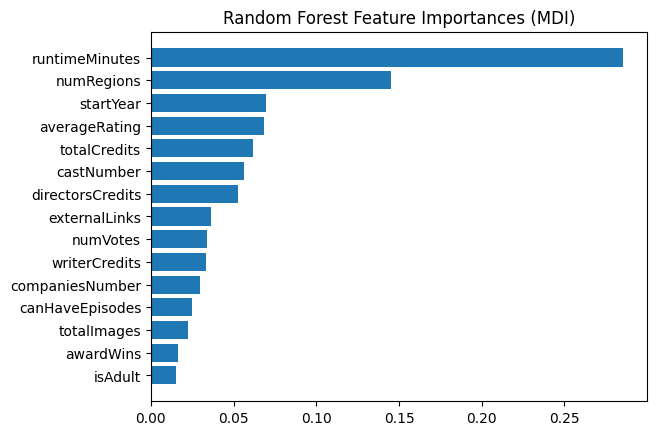

In [37]:
# Questo pezzo di codice visualizza le 15 feature più importanti usate dal modello Random Forest addestrato (clf)
# in base alla Mean Decrease in Impurity (MDI), ovvero alla riduzione media dell’impurità (Gini Index/Entropy) 
# che ogni feature contribuisce a ottenere negli split degli alberi.

nbr_features = 15

tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]  # le 15 più importanti

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(feature_names)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

In [38]:
from sklearn.tree import plot_tree

In [39]:
clf.estimators_[0]  

DecisionTreeClassifier(max_features='sqrt', random_state=209652396)

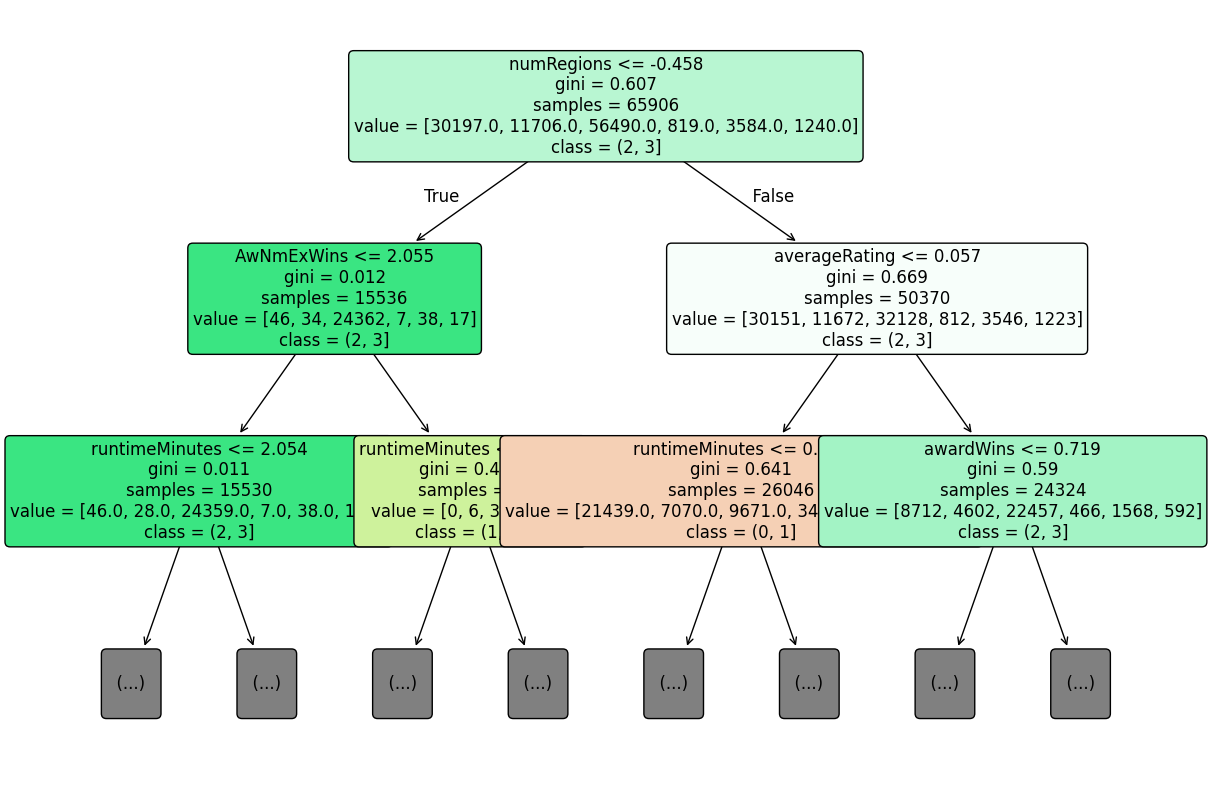

In [40]:
plt.figure(figsize=(14,10))
plot_tree(clf.estimators_[0], 
          feature_names=feature_names, 
          class_names=['(0, 1]', '(1, 2]', '(2, 3]', '(3, 4]', '(4, 5]', '(5, 6]', '(6, 7]', '(7, 8]', '(8, 9]', '(9, 10]'],
          filled=True, 
          rounded=True,
          fontsize=12,
          max_depth=2)  
plt.show()

In [41]:
from sklearn.inspection import permutation_importance

In [42]:
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

C:\Users\Tommaso\AppData\Local\Temp\ipykernel_25396\3330109390.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(feature_names)[sorted_idx])


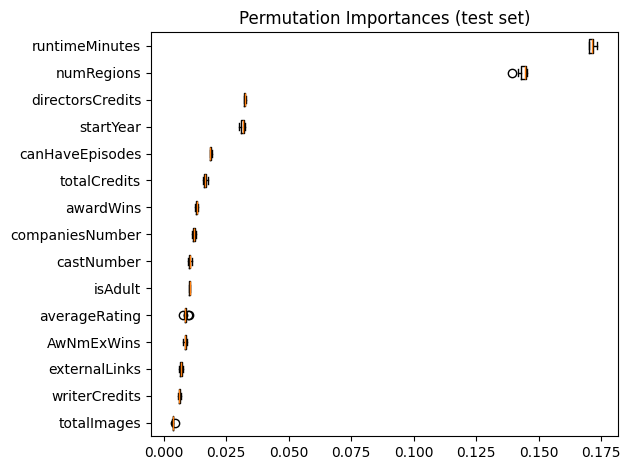

In [43]:
sorted_idx = result.importances_mean.argsort()[-nbr_features:]

fig, ax = plt.subplots()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(feature_names)[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.show()

n_estimators=100, OOB Score=0.9315
n_estimators=200, OOB Score=0.9323
n_estimators=300, OOB Score=0.9329
n_estimators=500, OOB Score=0.9331
n_estimators=600, OOB Score=0.9332
n_estimators=700, OOB Score=0.9335
n_estimators=800, OOB Score=0.9334
n_estimators=900, OOB Score=0.9332
n_estimators=1000, OOB Score=0.9332


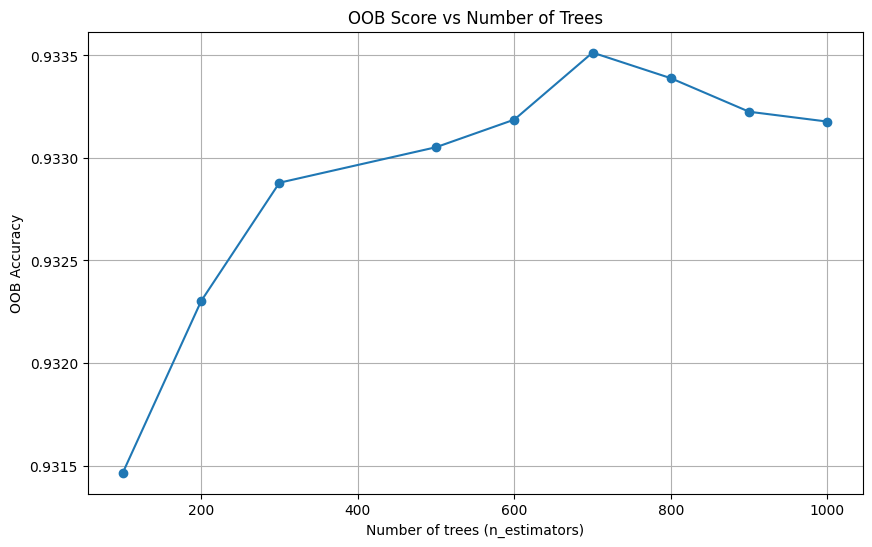

In [44]:
# Parametri da testare
n_estimators_list = [100, 200, 300, 500, 600, 700, 800, 900, 1000]
oob_scores = []

# Addestramento e calcolo OOB
for n in n_estimators_list:
    clf1 = RandomForestClassifier(n_estimators=n, oob_score=True, bootstrap=True, random_state=42, n_jobs=-1)
    clf1.fit(X_train, y_train)
    oob_scores.append(clf1.oob_score_)
    print(f'n_estimators={n}, OOB Score={clf1.oob_score_:.4f}')

# Plot dell'andamento dell’OOB score
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, oob_scores, marker='o')
plt.xlabel('Number of trees (n_estimators)')
plt.ylabel('OOB Accuracy')
plt.title('OOB Score vs Number of Trees')
plt.grid(True)
plt.show()


In [45]:
# Return probability estimates for the test data X.
y_test_pred_proba = clf.predict_proba(X_test)
y_test_pred_proba[0:10]

array([[0.11666667, 0.00333333, 0.87666667, 0.00333333, 0.        ,
        0.        ],
       [0.00666667, 0.        , 0.99333333, 0.        , 0.        ,
        0.        ],
       [0.04666667, 0.06666667, 0.86666667, 0.00333333, 0.01666667,
        0.        ],
       [0.02333333, 0.87333333, 0.06666667, 0.        , 0.03666667,
        0.        ],
       [0.33333333, 0.33666667, 0.19      , 0.01333333, 0.08333333,
        0.04333333],
       [0.04333333, 0.01333333, 0.94      , 0.00333333, 0.        ,
        0.        ],
       [0.97666667, 0.        , 0.00666667, 0.        , 0.01666667,
        0.        ],
       [0.00333333, 0.        , 0.99666667, 0.        , 0.        ,
        0.        ],
       [0.        , 0.00333333, 0.99333333, 0.        , 0.00333333,
        0.        ],
       [0.00333333, 0.        , 0.99333333, 0.        , 0.00333333,
        0.        ]])

In [46]:
# Ora, visto che le label sono più di 2, possiamo solo fare una ROC curve per ogni label vs the rest, con il metodo one-vs-the rest

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize


In [47]:
# Classi uniche nel dataset
classes = np.unique(y_test)

# Binarizza y_val
y_test_binarized = label_binarize(y_test, classes=classes)

y_test_binarized


array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]], shape=(44588, 6))

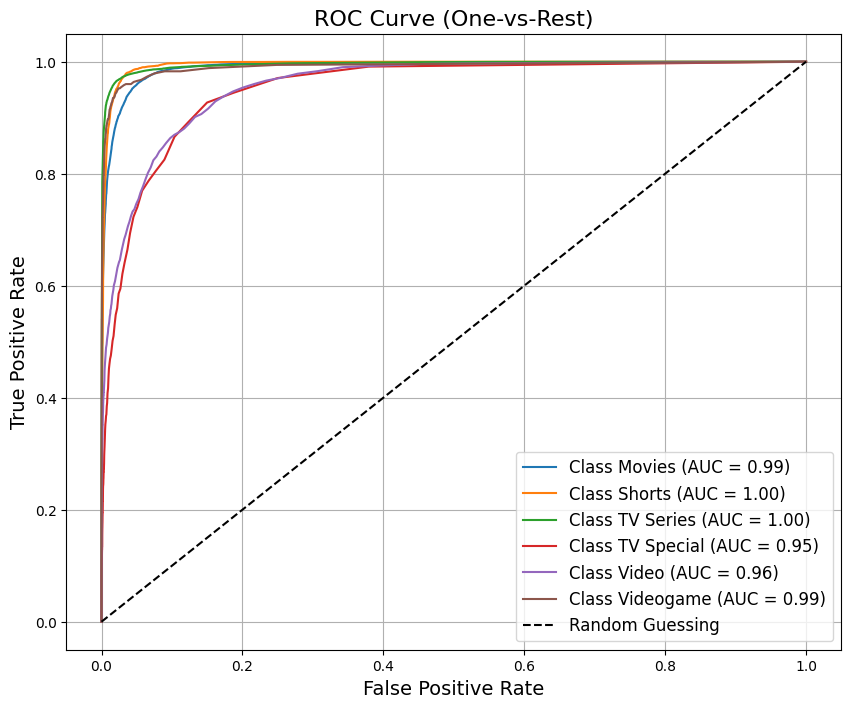

In [48]:
plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # ROC curve per la classe i
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_test_pred_proba[:, i])
    
    # Traccia la curva ROC
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc:.2f})")

# Linea casuale per riferimento
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

# Personalizza il grafico
plt.xlabel("False Positive Rate", fontsize = 14)
plt.ylabel("True Positive Rate", fontsize = 14)
plt.title("ROC Curve (One-vs-Rest)", fontsize = 16)
plt.legend(loc="best", fontsize=12)
plt.grid()
plt.show()


In [49]:
# AUC (AREA UNDER THE CURVE, Ti dice quanto bene il modello riesce a distinguere tra le classi.) 
# media di tutte le classi (le singole sono gia nel grafico)
roc_auc_score(y_test_binarized, y_test_pred_proba, multi_class="ovr", average="macro")

np.float64(0.980349597897837)

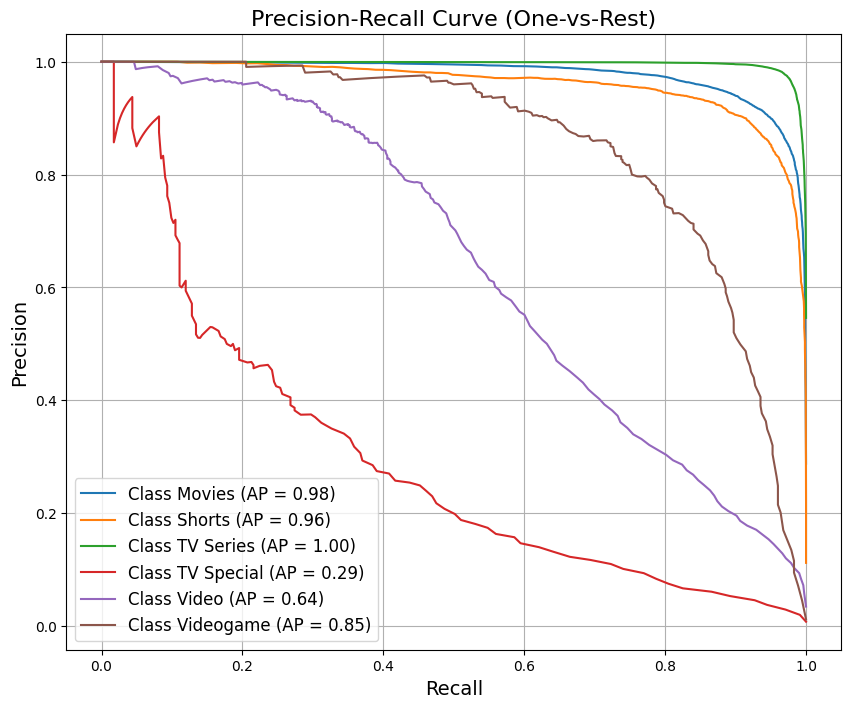

In [50]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # Precision-Recall curve per la classe i
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
    ap = average_precision_score(y_test_binarized[:, i], y_test_pred_proba[:, i])
    
    # Traccia la curva Precision-Recall
    plt.plot(recall, precision, label=f"Class {class_label} (AP = {ap:.2f})")

# Personalizza il grafico
plt.xlabel("Recall", fontsize=14)
plt.ylabel("Precision", fontsize=14)
plt.title("Precision-Recall Curve (One-vs-Rest)", fontsize=16)
plt.legend(loc="best", fontsize=12)
plt.grid()
plt.show()

# Boosting

In [51]:
from sklearn.ensemble import AdaBoostClassifier

If None, then the base estimator is DecisionTreeClassifier(max_depth=1).

In [52]:
clf = AdaBoostClassifier(estimator=None, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8722077689064323
F1-score [0.86048074 0.82971429 0.92280919 0.         0.13038278 0.51664447]
              precision    recall  f1-score   support

      Movies       0.83      0.90      0.86     12835
      Shorts       0.86      0.80      0.83      4992
   TV Series       0.90      0.95      0.92     24351
  TV Special       0.00      0.00      0.00       343
       Video       0.83      0.07      0.13      1541
   Videogame       0.86      0.37      0.52       526

    accuracy                           0.87     44588
   macro avg       0.71      0.51      0.54     44588
weighted avg       0.86      0.87      0.86     44588



c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tommaso\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [53]:
# clf = AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=100), n_estimators=10, random_state=0)
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

# print('Accuracy %s' % accuracy_score(y_test, y_pred))
# print('F1-score %s' % f1_score(y_test, y_pred, average=None))
# print(classification_report(y_test, y_pred))